In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from Set_up_for_performing import  perform_model, print_grid_search_attributes, plot_confusion_matrix

In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Load the CSV files
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Print to verify
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (203001, 42)
Test shape: (41810, 42)


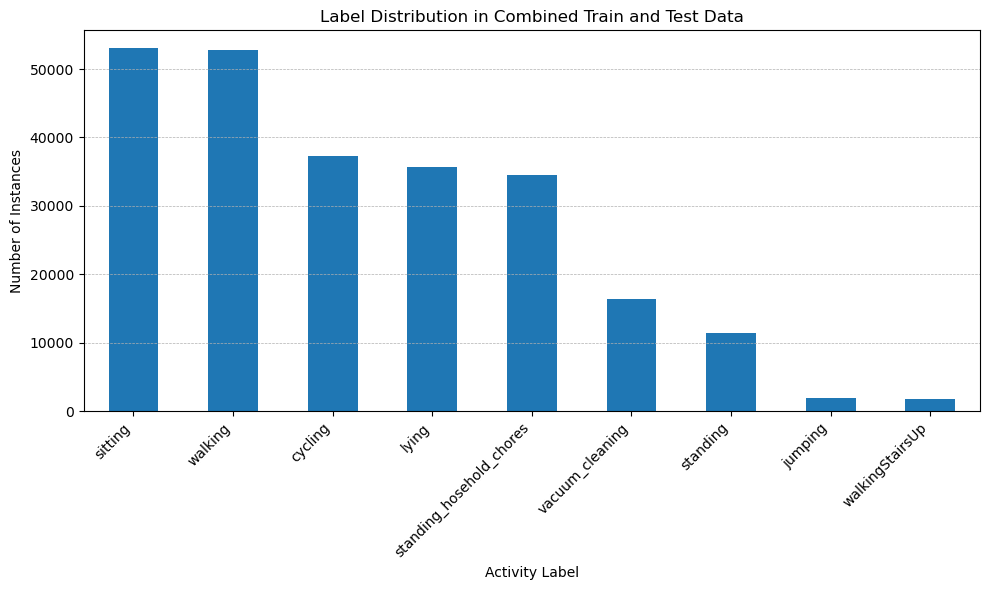

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Count label occurrences
label_counts = combined_data['label'].value_counts().sort_values(ascending=False)

# Plot the label distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution in Combined Train and Test Data')
plt.xlabel('Activity Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [9]:
print("train2 shape:", train_data.shape)
print("Unique labels in train_2:", train_data['label'].unique())

train2 shape: (203001, 42)
Unique labels in train_2: ['cycling' 'jumping' 'lying' 'sitting' 'standing'
 'standing_hosehold_chores' 'vacuum_cleaning' 'walking' 'walkingStairsUp']


In [12]:
print("train2 shape:", test_data.shape)
print("Unique labels in train_2:", test_data['label'].unique())

train2 shape: (41810, 42)
Unique labels in train_2: ['cycling' 'jumping' 'lying' 'sitting' 'standing'
 'standing_hosehold_chores' 'vacuum_cleaning' 'walking' 'walkingStairsUp']


In [14]:
print("Original label counts in train:\n", train_data['label'].value_counts())
print("\nOriginal label counts in test:\n", test_data['label'].value_counts())


Original label counts in train:
 label
sitting                     45741
walking                     39909
lying                       30654
cycling                     30339
standing_hosehold_chores    29380
vacuum_cleaning             13573
standing                    10254
jumping                      1678
walkingStairsUp              1473
Name: count, dtype: int64

Original label counts in test:
 label
walking                     12929
sitting                      7264
cycling                      6989
standing_hosehold_chores     5201
lying                        5027
vacuum_cleaning              2744
standing                     1109
jumping                       298
walkingStairsUp               249
Name: count, dtype: int64


In [16]:
train = train_data

In [18]:
test = test_data

In [20]:
# get X_train and y_train from csv files
X_train = train.drop(['user_id', 'label'], axis=1)
y_train = train.label

In [22]:

# get X_test and y_test from test csv file
X_test = train.drop(['user_id', 'label'], axis=1)
y_test = test.label

In [24]:
# Separate features and labels for training data
X_train = train.drop(columns=['label'])  # Drop the label column to get features
y_train = train['label']  # Select only the label column for targets

# Separate features and labels for testing data
X_test = test.drop(columns=['label'])  # Drop the label column to get features
y_test = test['label']  # Select only the label column for targets

# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (203001, 41)
y_train shape: (203001,)
X_test shape: (41810, 41)
y_test shape: (41810,)


In [26]:
label = train['label'].unique().tolist()


## 1. Logistic regression



Training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done

Training time (HH:MM:SS.ms): 0:37:39.672951

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.034120

---------------------
|      Accuracy      |
---------------------

    0.9645778521884717

--------------------
| Confusion Matrix |
--------------------

 [[ 6988     0     1     0     0     0     0     0     0]
 [    0   262     0     0    36     0     0     0     0]
 [    5     0  4972     9     0    41     0     0     0]
 [    0     0     9  7019    14   222     0     0     0]
 [    0     0     0     0  1102     7     0     0     0]
 [    0     0     0   254    33  4807    97    10     0]
 [    0     0     0     9    32   314  2339    50     0]
 [    0     0     0     9     4   154    29 12733     0]
 [    0     0     0     0     0     0     0   142   107]]


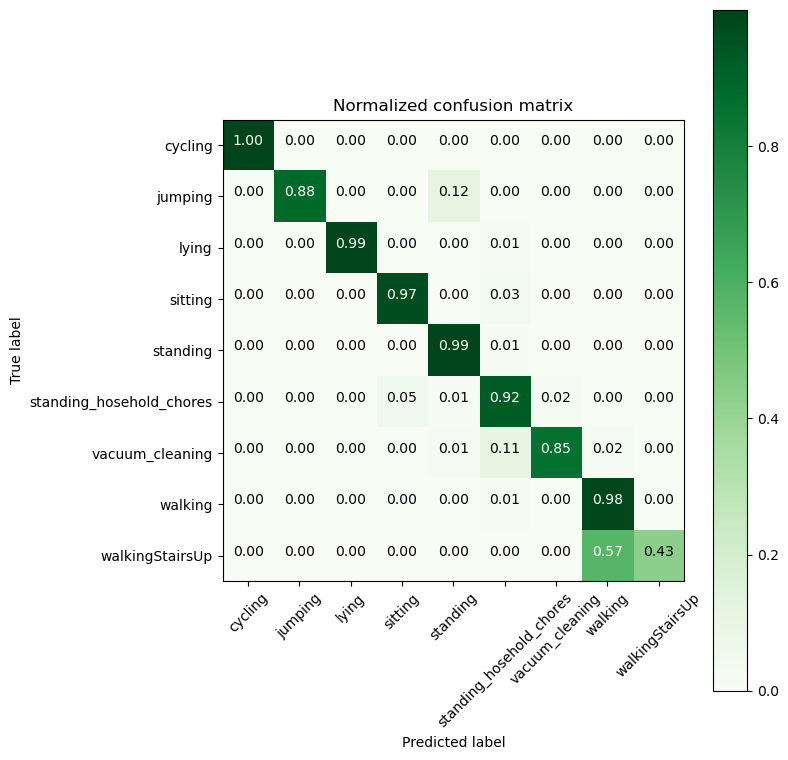

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                 cycling       1.00      1.00      1.00      6989
                 jumping       1.00      0.88      0.94       298
                   lying       1.00      0.99      0.99      5027
                 sitting       0.96      0.97      0.96      7264
                standing       0.90      0.99      0.95      1109
standing_hosehold_chores       0.87      0.92      0.89      5201
         vacuum_cleaning       0.95      0.85      0.90      2744
                 walking       0.98      0.98      0.98     12929
         walkingStairsUp       1.00      0.43      0.60       249

                accuracy                           0.96     41810
               macro avg       0.96      0.89      0.91     41810
            weighted avg       0.97      0.96      0.96     41810

--------------------------
|      Best Estimator     |
------

In [29]:


# Set up Grid Search for Logistic Regression
parameters = {'C': [0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l2', 'l1']}
log_reg = linear_model.LogisticRegression(solver='liblinear')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=label)
print_grid_search_attributes(log_reg_grid)


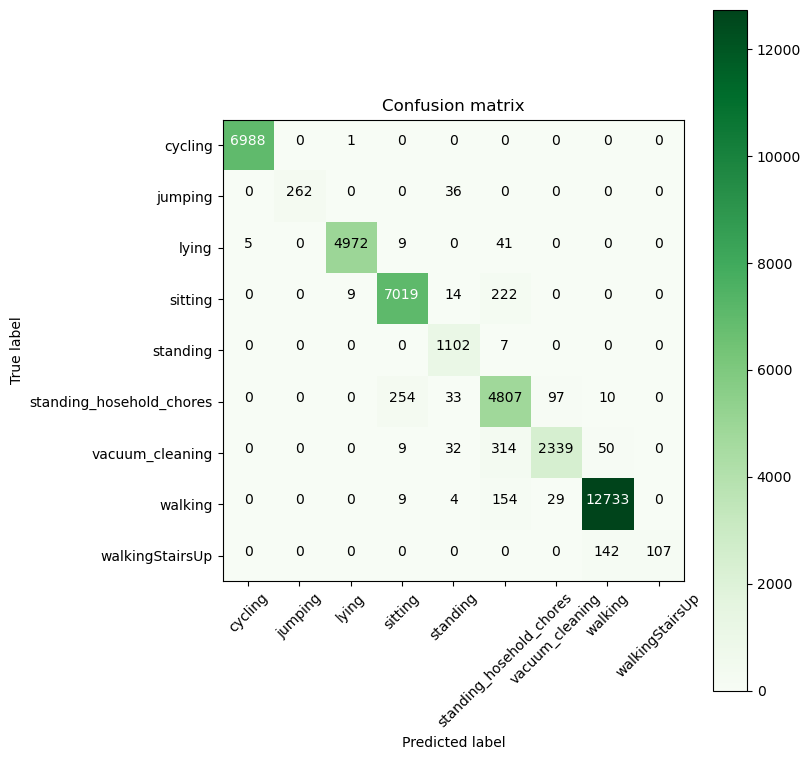

In [30]:
# and labels is defined with the names of the classes
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()


In [31]:
# observe the attributes of the model
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

--------------------------
|     Best Parameters     |
--------------------------
	Parameters of best estimator:

	{'C': 0.1, 'penalty': 'l1'}

---------------------------------
|   No of Cross Validation Sets  |
---------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate score of best estimator:

	0.9113895990660145



## 2. Linear Support Vector Classifier


Training the model...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Gjert\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Gjert\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Done

Training time (HH:MM:SS.ms): 0:47:48.347001

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.011118

---------------------
|      Accuracy      |
---------------------

    0.34089930638603205

--------------------
| Confusion Matrix |
--------------------

 [[ 6989     0     0     0     0     0     0     0     0]
 [   59     0     0   239     0     0     0     0     0]
 [  216     0     0  4168     0     0     0   643     0]
 [    0     0     0  7264     0     0     0     0     0]
 [    0     0     0  1109     0     0     0     0     0]
 [    0     0     0  5201     0     0     0     0     0]
 [    0     0     0  2744     0     0     0     0     0]
 [    0     0     0 12929     0     0     0     0     0]
 [    0     0     0   249     0     0     0     0     0]]


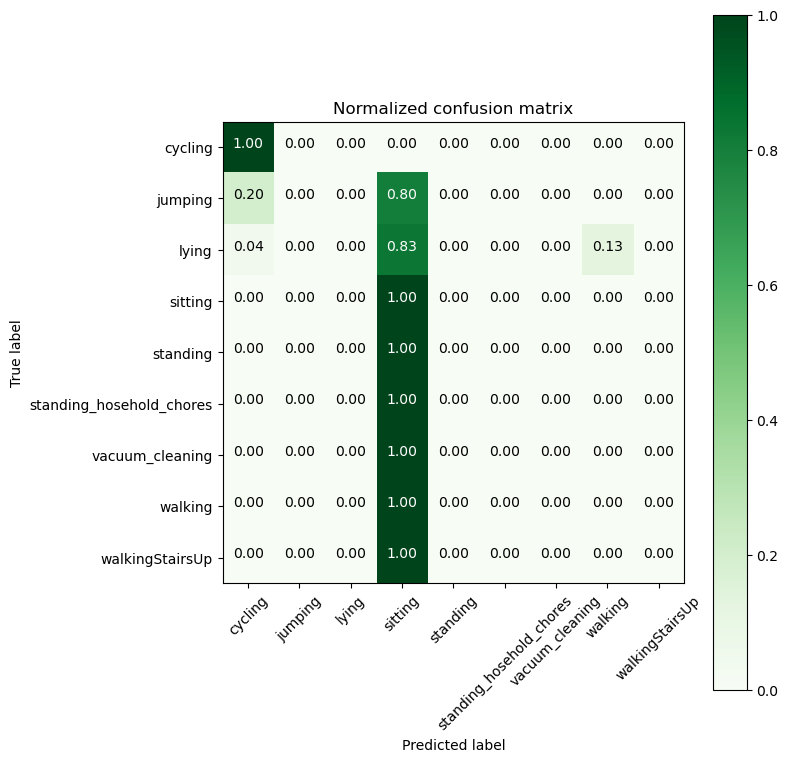

-------------------------
| Classification Report |
-------------------------


C:\Users\Gjert\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gjert\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                          precision    recall  f1-score   support

                 cycling       0.96      1.00      0.98      6989
                 jumping       0.00      0.00      0.00       298
                   lying       0.00      0.00      0.00      5027
                 sitting       0.21      1.00      0.35      7264
                standing       0.00      0.00      0.00      1109
standing_hosehold_chores       0.00      0.00      0.00      5201
         vacuum_cleaning       0.00      0.00      0.00      2744
                 walking       0.00      0.00      0.00     12929
         walkingStairsUp       0.00      0.00      0.00       249

                accuracy                           0.34     41810
               macro avg       0.13      0.22      0.15     41810
            weighted avg       0.20      0.34      0.23     41810



C:\Users\Gjert\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=label)

In [35]:
print_grid_search_attributes(lr_svc_grid_results['model'])


--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, tol=5e-05)

--------------------------
|     Best Parameters     |
--------------------------
	Parameters of best estimator:

	{'C': 1}

---------------------------------
|   No of Cross Validation Sets  |
---------------------------------

	Total number of cross validation sets: None

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate score of best estimator:

	0.41493375141940625



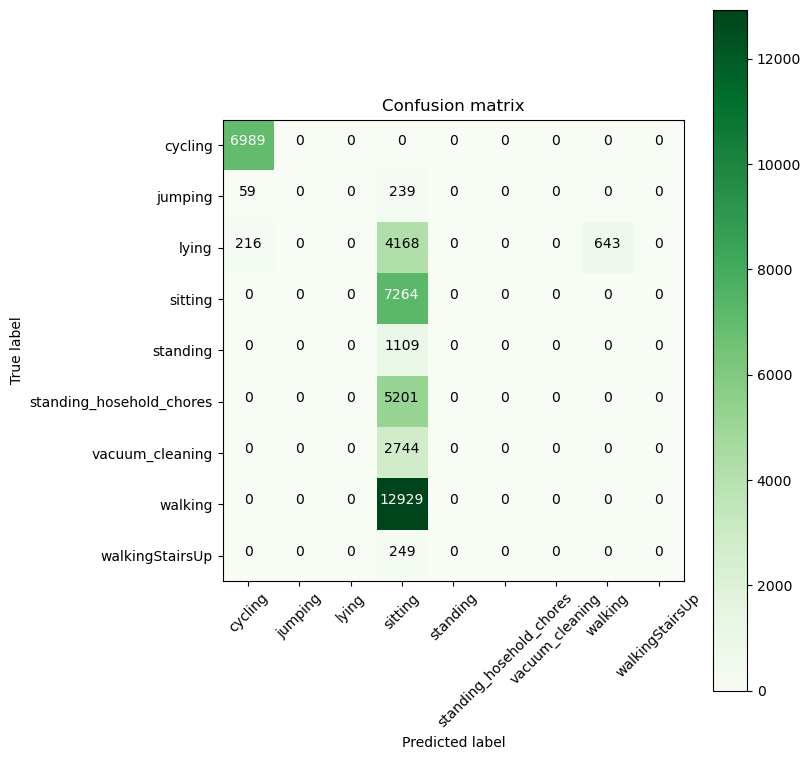

In [36]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()


## 3. KNN


Training the model...
Done

Training time (HH:MM:SS.ms): 0:01:35.972567

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:07.685611

---------------------
|      Accuracy      |
---------------------

    0.5837359483377182

--------------------
| Confusion Matrix |
--------------------

 [[6989    0    0    0    0    0    0    0    0]
 [ 146  152    0    0    0    0    0    0    0]
 [   0 2513 2514    0    0    0    0    0    0]
 [   0    0 3632 3632    0    0    0    0    0]
 [   0    0    0  554  555    0    0    0    0]
 [   0    0    0    0 2600 2601    0    0    0]
 [   0    0    0    0    0 1372 1372    0    0]
 [   0    0    0    0    0    0 6464 6465    0]
 [   0    0    0    0    0    0    0  123  126]]


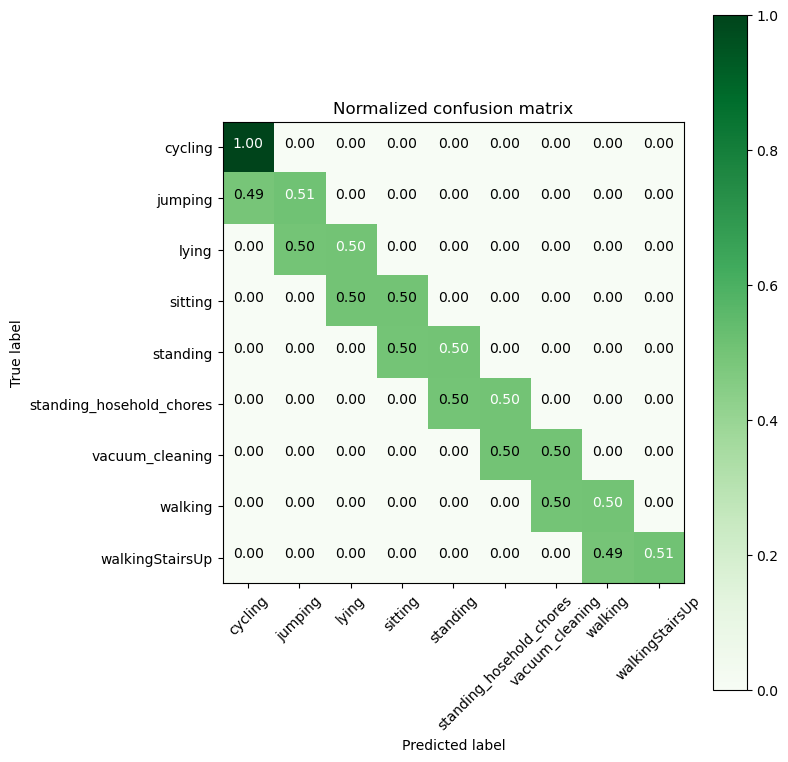

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                 cycling       0.98      1.00      0.99      6989
                 jumping       0.06      0.51      0.10       298
                   lying       0.41      0.50      0.45      5027
                 sitting       0.87      0.50      0.63      7264
                standing       0.18      0.50      0.26      1109
standing_hosehold_chores       0.65      0.50      0.57      5201
         vacuum_cleaning       0.18      0.50      0.26      2744
                 walking       0.98      0.50      0.66     12929
         walkingStairsUp       1.00      0.51      0.67       249

                accuracy                           0.58     41810
               macro avg       0.59      0.56      0.51     41810
            weighted avg       0.77      0.58      0.63     41810



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
parameters = {'n_neighbors': np.arange(3, 10, 2)}  # Try k = 3, 5, 7, 9

# Create a KNN classifier
knn = KNeighborsClassifier()

# Set up the Grid Search
knn_grid = GridSearchCV(knn, param_grid=parameters, n_jobs=-1)

# Train and evaluate the model
knn_grid_results = perform_model(knn_grid, X_train, y_train, X_test, y_test, class_labels=label)


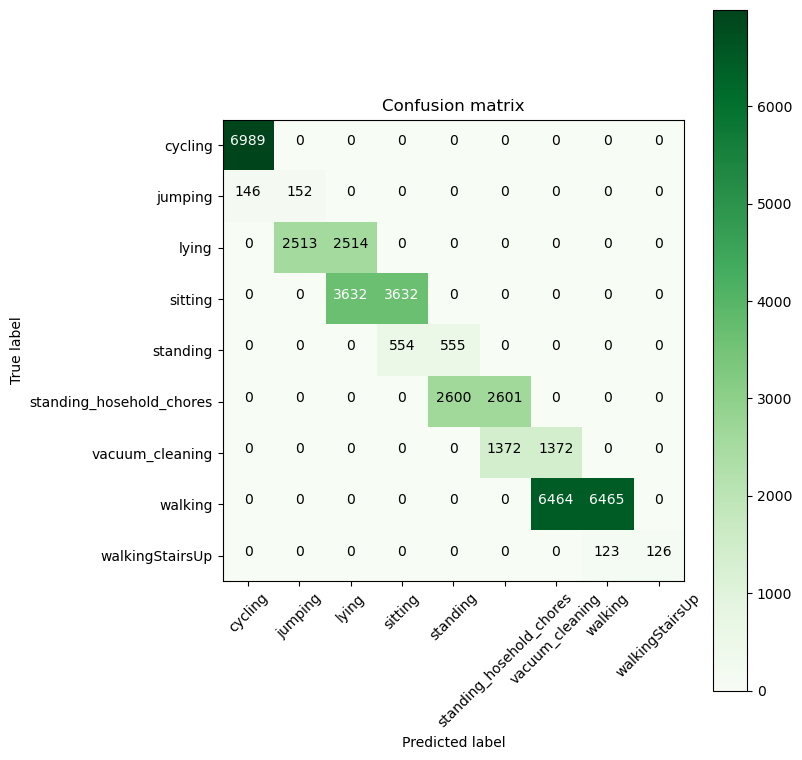

In [40]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(knn_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()


In [41]:
print_grid_search_attributes(knn_grid_results['model'])


--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(n_neighbors=3)

--------------------------
|     Best Parameters     |
--------------------------
	Parameters of best estimator:

	{'n_neighbors': 3}

---------------------------------
|   No of Cross Validation Sets  |
---------------------------------

	Total number of cross validation sets: None

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate score of best estimator:

	0.9276997915433907



## 4. Decision Tree

Training the model...
Done

Training time (HH:MM:SS.ms): 0:00:10.558579

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.008049

---------------------
|      Accuracy      |
---------------------

    0.5835206888304233

--------------------
| Confusion Matrix |
--------------------

 [[6989    0    0    0    0    0    0    0    0]
 [ 149  149    0    0    0    0    0    0    0]
 [   0 2514 2513    0    0    0    0    0    0]
 [   0    0 3632 3632    0    0    0    0    0]
 [   0    0    0  555  554    0    0    0    0]
 [   0    0    0    0 2601 2600    0    0    0]
 [   0    0    0    0    0 1372 1372    0    0]
 [   0    0    0    0    0    0 6465 6464    0]
 [   0    0    0    0    0    0    0  125  124]]


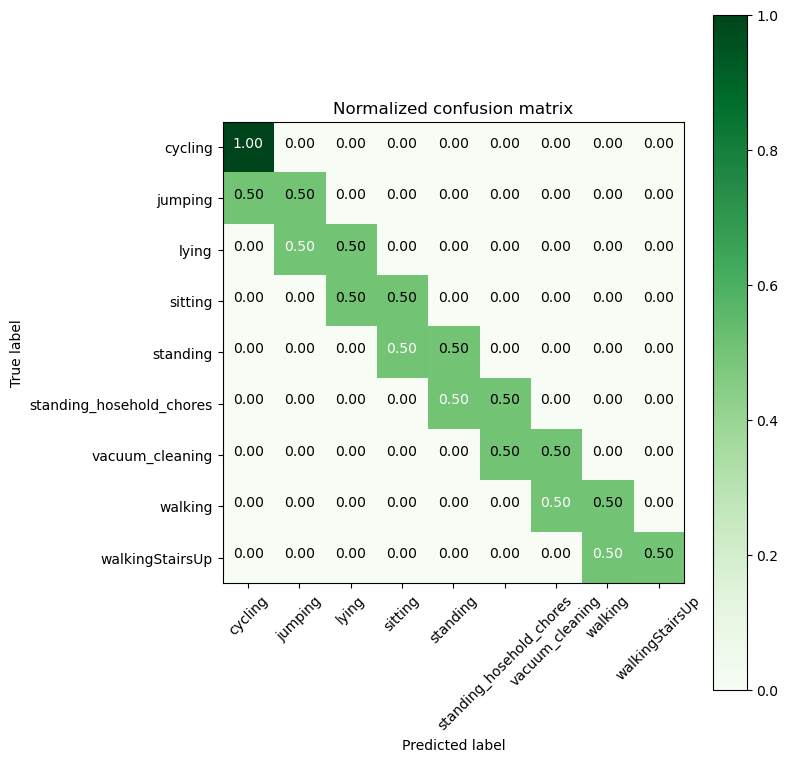

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                 cycling       0.98      1.00      0.99      6989
                 jumping       0.06      0.50      0.10       298
                   lying       0.41      0.50      0.45      5027
                 sitting       0.87      0.50      0.63      7264
                standing       0.18      0.50      0.26      1109
standing_hosehold_chores       0.65      0.50      0.57      5201
         vacuum_cleaning       0.18      0.50      0.26      2744
                 walking       0.98      0.50      0.66     12929
         walkingStairsUp       1.00      0.50      0.66       249

                accuracy                           0.58     41810
               macro avg       0.59      0.56      0.51     41810
            weighted avg       0.77      0.58      0.63     41810



In [43]:

from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=label)

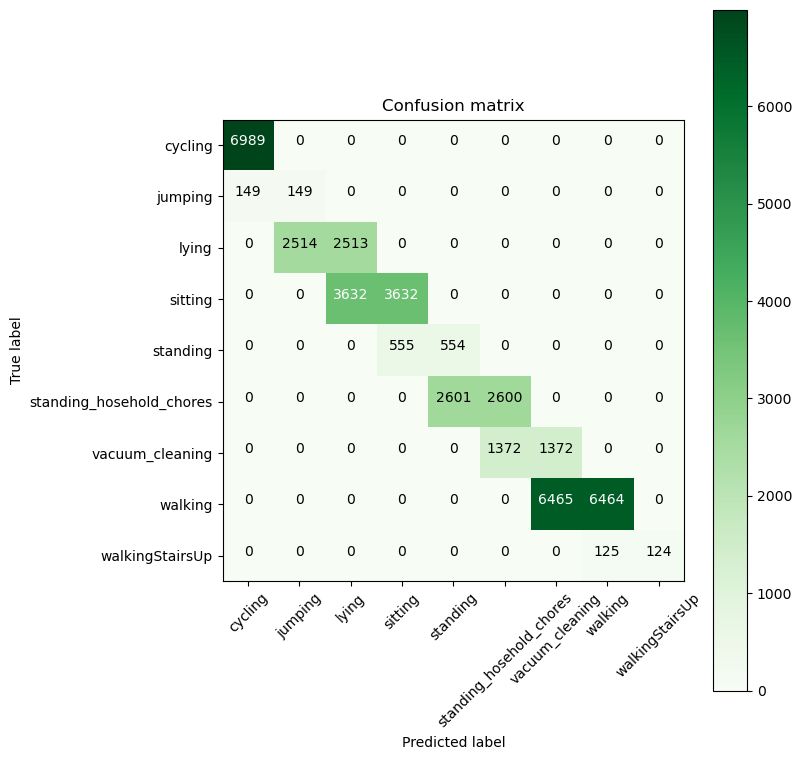

In [44]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()

In [ ]:
print_grid_search_attributes(dt_grid_results['model'])


--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=np.int64(5))

--------------------------
|     Best Parameters     |
--------------------------
	Parameters of best estimator:

	{'max_depth': np.int64(5)}

---------------------------------
|   No of Cross Validation Sets  |
---------------------------------

	Total number of cross validation sets: None

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate score of best estimator:

	0.9276850135822567



## 5. Naive Bayes


Training the model...
Done

Training time (HH:MM:SS.ms): 0:00:00.140320

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.102695

---------------------
|      Accuracy      |
---------------------

    0.8759866060751017

--------------------
| Confusion Matrix |
--------------------

 [[ 6978     0     1    10     0     0     0     0     0]
 [    1   290     7     0     0     0     0     0     0]
 [  285     4  4685    52     0     1     0     0     0]
 [   13     0  3595  3650     0     6     0     0     0]
 [    0     0     0    15  1093     1     0     0     0]
 [    0     0     0    18   439  4744     0     0     0]
 [    0     0     0     0     0   518  2226     0     0]
 [    0     0     0     0     0     0    25 12904     0]
 [    0     0     0     0     0     0     0   194    55]]


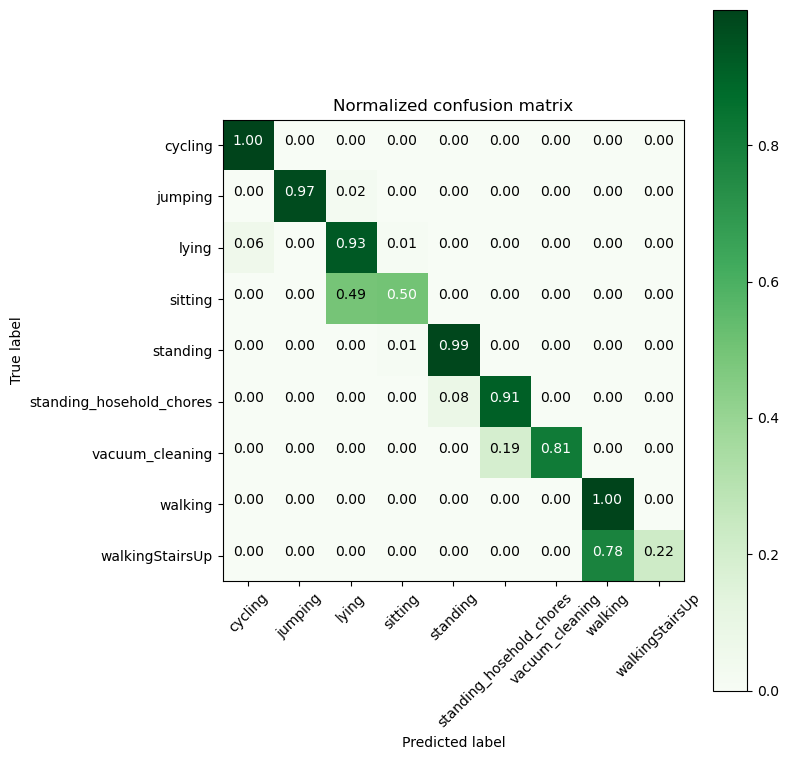

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                 cycling       0.96      1.00      0.98      6989
                 jumping       0.99      0.97      0.98       298
                   lying       0.57      0.93      0.70      5027
                 sitting       0.97      0.50      0.66      7264
                standing       0.71      0.99      0.83      1109
standing_hosehold_chores       0.90      0.91      0.91      5201
         vacuum_cleaning       0.99      0.81      0.89      2744
                 walking       0.99      1.00      0.99     12929
         walkingStairsUp       1.00      0.22      0.36       249

                accuracy                           0.88     41810
               macro avg       0.90      0.81      0.81     41810
            weighted avg       0.91      0.88      0.87     41810



In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

nb = GaussianNB()

nb_results = perform_model(
    nb,
    X_train, y_train_encoded,
    X_test, y_test_encoded,
    class_labels=label_encoder.classes_
)

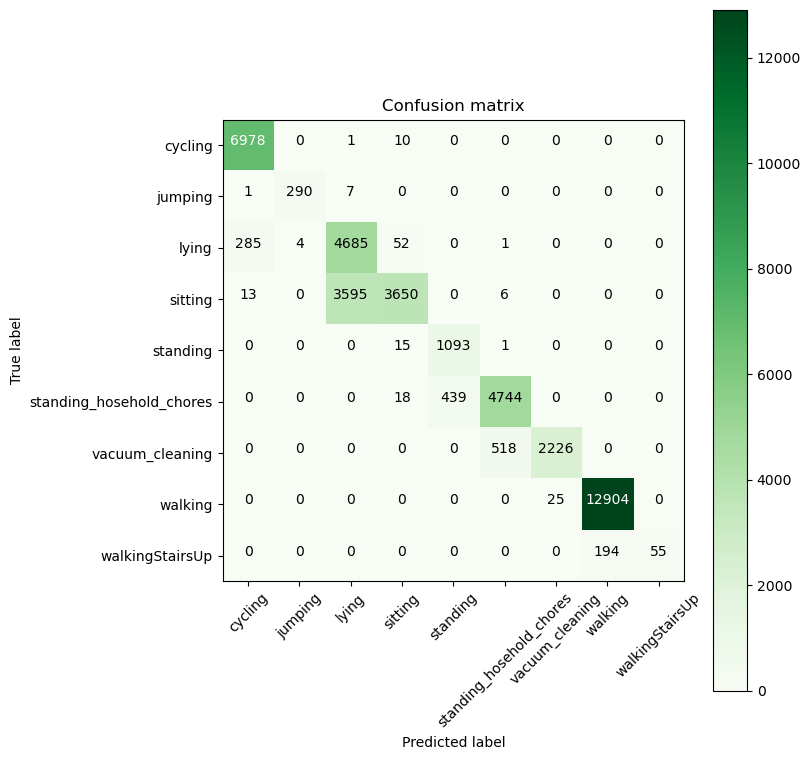

In [51]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(nb_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()

## 6. Random Forest Classifier

Training the model...
Done

Training time (HH:MM:SS.ms): 0:24:52.888675

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.311784

---------------------
|      Accuracy      |
---------------------

    0.7486725663716814

--------------------
| Confusion Matrix |
--------------------

 [[6989    0    0    0    0    0    0    0    0]
 [   2  262    0    0   34    0    0    0    0]
 [   0    0 5005    3    0   19    0    0    0]
 [   0    0 2902 4311   12   39    0    0    0]
 [   0    0    0    0 1104    5    0    0    0]
 [   0    0    0    4   38 5159    0    0    0]
 [   0    0    0    0    9  875 1860    0    0]
 [   0    0    0    0    0   25 6440 6464    0]
 [   0    0    0    0    0    0    0  101  148]]


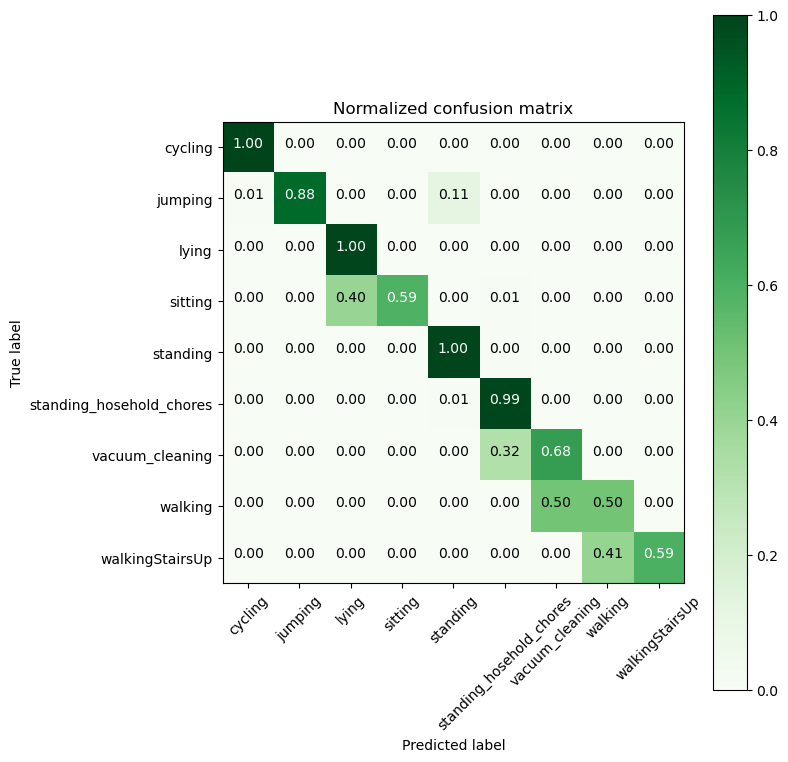

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                 cycling       1.00      1.00      1.00      6989
                 jumping       1.00      0.88      0.94       298
                   lying       0.63      1.00      0.77      5027
                 sitting       1.00      0.59      0.74      7264
                standing       0.92      1.00      0.96      1109
standing_hosehold_chores       0.84      0.99      0.91      5201
         vacuum_cleaning       0.22      0.68      0.34      2744
                 walking       0.98      0.50      0.66     12929
         walkingStairsUp       1.00      0.59      0.75       249

                accuracy                           0.75     41810
               macro avg       0.84      0.80      0.79     41810
            weighted avg       0.88      0.75      0.77     41810



In [56]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=label)

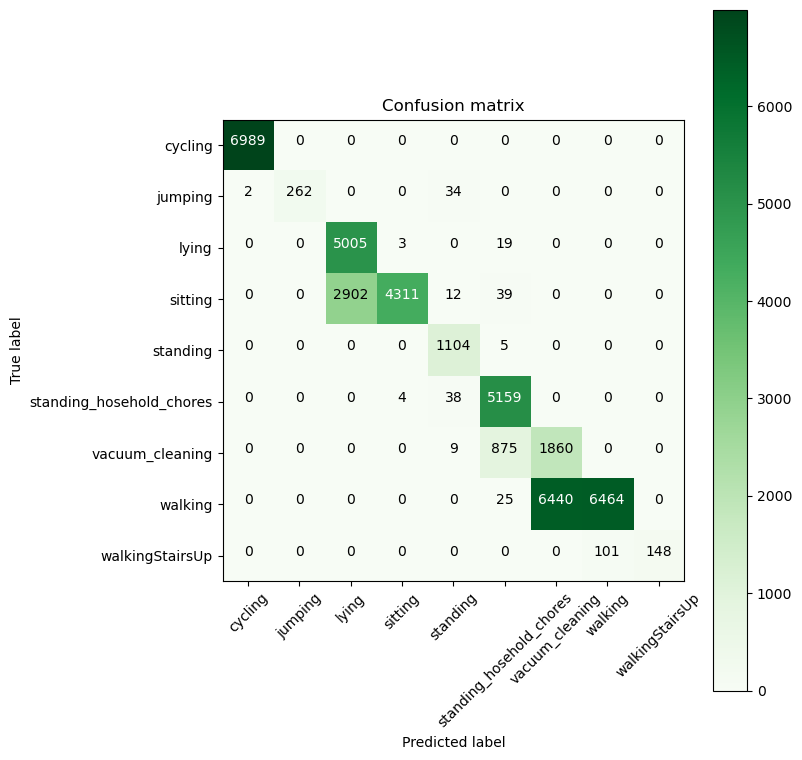

In [57]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=label, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens)
plt.show()

In [58]:
print_grid_search_attributes(rfc_grid_results['model'])


--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=170)

--------------------------
|     Best Parameters     |
--------------------------
	Parameters of best estimator:

	{'max_depth': 13, 'n_estimators': 170}

---------------------------------
|   No of Cross Validation Sets  |
---------------------------------

	Total number of cross validation sets: None

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate score of best estimator:

	0.9648473674421133



In [72]:

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))


print('KNN                 : {:.04}%      {:.04}% '.format(knn_grid_results['accuracy'] * 100,\
                                                        100-(knn_grid_results['accuracy'] * 100)))

print('Decision Tree       : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                      100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('Naive Bayes         : {:.04}%       {:.04}% '.format(nb_results['accuracy'] * 100,\
                                                        100-(nb_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.46%      3.542%
Linear SVC          : 34.09%      65.91% 
KNN                 : 58.37%      41.63% 
Decision Tree       : 58.35%      41.65% 
Random Forest       : 74.87%      25.13% 
Naive Bayes         : 87.6%       12.4% 
